In [105]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

dataset = pd.read_csv('countries.csv')
print(dataset)


                   Country   Region  Population  Area (sq. mi.)  \
0             Afghanistan      ASIA    31056997          647500   
1                 Albania    EUROPE     3581655           28748   
2                 Algeria    AFRICA    32930091         2381740   
3          American Samoa   OCEANIA       57794             199   
4                 Andorra    EUROPE       71201             468   
5                  Angola    AFRICA    12127071         1246700   
6                Anguilla   AMERICA       13477             102   
7       Antigua & Barbuda   AMERICA       69108             443   
8               Argentina   AMERICA    39921833         2766890   
9                 Armenia    EUROPE     2976372           29800   
10                  Aruba   AMERICA       71891             193   
11              Australia   OCEANIA    20264082         7686850   
12                Austria    EUROPE     8192880           83870   
13             Azerbaijan    EUROPE     7961619           8660

In [106]:
dataset.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service',
       'GDP ($ per capita)'],
      dtype='object')

In [107]:
dataset = pd.get_dummies(dataset, columns=['Region'])
print(dataset)

                   Country  Population  Area (sq. mi.)  \
0             Afghanistan     31056997          647500   
1                 Albania      3581655           28748   
2                 Algeria     32930091         2381740   
3          American Samoa        57794             199   
4                 Andorra        71201             468   
5                  Angola     12127071         1246700   
6                Anguilla        13477             102   
7       Antigua & Barbuda        69108             443   
8               Argentina     39921833         2766890   
9                 Armenia      2976372           29800   
10                  Aruba        71891             193   
11              Australia     20264082         7686850   
12                Austria      8192880           83870   
13             Azerbaijan      7961619           86600   
14           Bahamas. The       303770           13940   
15                Bahrain       698585             665   
16            

In [108]:
dataset=dataset.drop(columns=['Region_ASIA', 'Region_AMERICA', 'Region_OCEANIA', 'Region_AFRICA'])
print(dataset)

                   Country  Population  Area (sq. mi.)  \
0             Afghanistan     31056997          647500   
1                 Albania      3581655           28748   
2                 Algeria     32930091         2381740   
3          American Samoa        57794             199   
4                 Andorra        71201             468   
5                  Angola     12127071         1246700   
6                Anguilla        13477             102   
7       Antigua & Barbuda        69108             443   
8               Argentina     39921833         2766890   
9                 Armenia      2976372           29800   
10                  Aruba        71891             193   
11              Australia     20264082         7686850   
12                Austria      8192880           83870   
13             Azerbaijan      7961619           86600   
14           Bahamas. The       303770           13940   
15                Bahrain       698585             665   
16            

In [109]:
dataset=dataset.dropna()
dataset.reset_index(drop=True, inplace=True)


In [110]:
X=dataset.drop(columns=['Country','Region_EUROPE'])
y=dataset['Region_EUROPE']
#y.reset_index(drop=True, inplace=True)
print(X,y)
print(X.shape)
print(y.shape)

     Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0      31056997          647500                        48.0   
1       3581655           28748                       124.6   
2      32930091         2381740                        13.8   
3         13477             102                       132.1   
4         69108             443                       156.0   
5      39921833         2766890                        14.4   
6       2976372           29800                        99.9   
7         71891             193                       372.5   
8      20264082         7686850                         2.6   
9       8192880           83870                        97.7   
10      7961619           86600                        91.9   
11       303770           13940                        21.8   
12       698585             665                      1050.5   
13    147365352          144000                      1023.4   
14       279912             431                       6

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

n_estimators=10
algo= LogisticRegression()
model= AdaBoostClassifier(base_estimator= algo, n_estimators=n_estimators, algorithm='SAMME')

model.fit(X,y)
weights= model.estimator_weights_
print (weights)
model.estimators_[1]

NameError: name 'X' is not defined

In [112]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators=10
model= AdaBoostClassifier(n_estimators=n_estimators, algorithm='SAMME')

model.fit(X,y)
weights= model.estimator_weights_
print (weights)
model.estimators_[1]

[2.13073484 1.37604627 1.75783467 1.2789016  1.35452684 1.36599447
 1.29223552 1.46138745 0.9101492  0.91626839]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1068619812, splitter='best')

In [114]:
y_predict=model.predict(X)
print(y_predict)

[0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0]


In [115]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y, y_predict)
print(accuracy)

0.8268156424581006


In [116]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=3).mean())  

0.8655367231638418


In [117]:
def get_alphas(weights, n_estimators, X, y, y_predict):
    alphas=[1/len(X) for i in range(len(X))]
    for i in range(n_estimators):
        for j in range(len(alphas)):
            if y_predict[j]==y[j]:
                alphas[j]=alphas[j]*np.exp(-weights[i])
            else:
                alphas[j]=alphas[j]*np.exp(weights[i])
    return alphas

In [118]:
alphas= get_alphas(weights, n_estimators, X, y, y_predict)
print(alphas)

[0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.14267259331058574, 0.14267259331058574, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187

In [119]:
len(alphas)

179

In [120]:
index=[ i for i in range(len(alphas))  if alphas[i]<0.001]
index

[0,
 2,
 5,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 161,
 162,
 164,
 166,
 169,
 170,
 173,
 174,
 175,
 176,
 177,
 178]

In [121]:
y=y[index]
X=X.iloc[index,:]
dataset=dataset.iloc[index]

In [122]:
y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [123]:
model.fit(X,y)
weights= model.estimator_weights_
print(weights)

[0.70329955 1.49234246 1.41079922 0.49405724 3.28405298 7.12583137
 1.52601703 1.17805173 0.86807177 0.88802106]


In [124]:
y_predict=model.predict(X)
print(y_predict)

[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [125]:
accuracy= accuracy_score(y, y_predict)
print(accuracy)

1.0


In [126]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=3).mean())  

0.8914285714285715


In [127]:
def predict(Country, dataset, y_predict):
    for i in range(len(dataset)):
        if dataset['Country'].iloc[i]==Country:
            return y_predict[i]
    if i==(len(dataset)-1):
        print('no such country in dataset(it could be an outlier!!)')    
    #y_predict= model.predict(dataset[dataset['Country']==Country].iloc[0,1:-1])

In [128]:
Country='Spain '
predict(Country, dataset, y_predict)

1

In [129]:
dataset

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($ per capita),Region_EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38,700.0,0
1,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00,6000.0,0
2,Argentina,39921833,2766890,14.4,0.18,0.61,15.18,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,95.00,358.00,547.00,11200.0,0
3,Aruba,71891,193,372.5,35.49,0.00,5.89,97.0,516.1,10.53,0.00,89.47,2.0,11.03,6.68,4.00,333.00,663.00,28000.0,0
4,Australia,20264082,7686850,2.6,0.34,3.98,4.69,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,38.00,262.00,0.70,29000.0,0
5,Austria,8192880,83870,97.7,0.00,2.00,4.66,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,18.00,304.00,678.00,30000.0,1
6,Bahrain,698585,665,1050.5,24.21,1.05,17.27,89.1,281.3,2.82,5.63,91.55,1.0,17.80,4.14,5.00,387.00,608.00,16900.0,0
7,Bangladesh,147365352,144000,1023.4,0.40,-0.71,62.60,43.1,7.3,62.11,3.07,34.82,2.0,29.80,8.27,199.00,198.00,603.00,1900.0,0
8,Barbados,279912,431,649.5,22.51,-0.31,12.50,97.4,481.9,37.21,2.33,60.46,2.0,12.71,8.67,0.06,0.16,0.78,15700.0,0
9,Belarus,10293011,207600,49.6,0.00,2.54,13.37,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,93.00,316.00,591.00,6100.0,1


In [131]:



import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier




def get_alphas(weights, n_estimators, X, y, y_predict):
    alphas=[1/len(X) for i in range(len(X))]
    for i in range(n_estimators):
        for j in range(len(alphas)):
            if y_predict[j]==y[j]:
                alphas[j]=alphas[j]*np.exp(-weights[i])
            else:
                alphas[j]=alphas[j]*np.exp(weights[i])
    return alphas



def predict(Country, dataset, y_predict):
    for i in range(len(dataset)):
        if dataset['Country'].iloc[i]==Country:
            return y_predict[i]
    if i==(len(dataset)-1):
        print('no such country in dataset(it could be an outlier!!)')    
    #y_predict= model.predict(dataset[dataset['Country']==Country].iloc[0,1:-1])


    
    
dataset = pd.read_csv('countries.csv')
print(dataset)


print(dataset.columns)


dataset = pd.get_dummies(dataset, columns=['Region'])
print(dataset)


dataset=dataset.drop(columns=['Region_ASIA', 'Region_AMERICA', 'Region_OCEANIA', 'Region_AFRICA'])
print(dataset)


dataset=dataset.dropna()
dataset.reset_index(drop=True, inplace=True)


X=dataset.drop(columns=['Country','Region_EUROPE'])
y=dataset['Region_EUROPE']
print(X,y)
print(X.shape)
print(y.shape)



n_estimators=10
algo= LogisticRegression()
model= AdaBoostClassifier(base_estimator= algo, n_estimators=n_estimators, algorithm='SAMME')

model.fit(X,y)
weights= model.estimator_weights_
print (weights)
model.estimators_[1]




y_predict=model.predict(X)
print(y_predict)



from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y, y_predict)
print(accuracy)



from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=3).mean())  


alphas= get_alphas(weights, n_estimators, X, y, y_predict)
print(alphas)

index=[ i for i in range(len(alphas))  if alphas[i]<0.001]
index


y=y[index]
X=X.iloc[index,:]
dataset=dataset.iloc[index]


y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)


model.fit(X,y)
weights= model.estimator_weights_
print(weights)

y_predict=model.predict(X)
print(y_predict)


accuracy= accuracy_score(y, y_predict)
print(accuracy)


from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=3).mean())  


Country='Spain '
predict(Country, dataset, y_predict)




                   Country   Region  Population  Area (sq. mi.)  \
0             Afghanistan      ASIA    31056997          647500   
1                 Albania    EUROPE     3581655           28748   
2                 Algeria    AFRICA    32930091         2381740   
3          American Samoa   OCEANIA       57794             199   
4                 Andorra    EUROPE       71201             468   
5                  Angola    AFRICA    12127071         1246700   
6                Anguilla   AMERICA       13477             102   
7       Antigua & Barbuda   AMERICA       69108             443   
8               Argentina   AMERICA    39921833         2766890   
9                 Armenia    EUROPE     2976372           29800   
10                  Aruba   AMERICA       71891             193   
11              Australia   OCEANIA    20264082         7686850   
12                Austria    EUROPE     8192880           83870   
13             Azerbaijan    EUROPE     7961619           8660

[0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.14267259331058574, 0.14267259331058574, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.0002187526801588536, 0.14267259331058574, 0.0002187526801588536, 0.0002187

1

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import seed#, shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

filename = 'countries.csv'
data = pd.read_csv(filename).dropna()
feature_name = data.columns[2:-1]
data = data.values

seed(0)
name = data[:, 0]
y = data[:, 1] == 'EUROPE'
# make class labels +-1  
y = y.astype('int') * 2 - 1 
X = data[:, 2:].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

algo = LogisticRegression()
model = AdaBoostClassifier(base_estimator=algo, n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

model.estimator_weights_
log_w_i = np.zeros(len(y_train), dtype='float')
for i in range(len(log_w_i)):
    item = np.reshape(X_train[i, :], (1, 18))
    for j in range(len(model.estimators_)):
        y_pred = model.estimators_[j].predict(item)
        alpha = model.estimator_weights_[j]
        log_w_i[i] -= alpha * y_train[i] * y_pred[0]

w_i = np.exp(log_w_i)
w_i = w_i / np.sum(w_i)
not_outliers = w_i < np.mean(np.sort(w_i)[:-20]) + 3 * np.std(np.sort(w_i)[:-20])

print("{} outliers".format(len(y_train) - sum(not_outliers)))

algo = LogisticRegression()
model = AdaBoostClassifier(base_estimator=algo, n_estimators=10)
model.fit(X_train[not_outliers], y_train[not_outliers])
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

plt.scatter(range(1,21), np.sort(w_i)[-20:])
plt.plot(range(1,21), np.sort(w_i)[-20:])
plt.title("samples weights")
plt.xlabel("sorted samples")
plt.yscale('log')
plt.ylabel("weights")
plt.xticks(range(0,21,2))
plt.show()


In [35]:
import pandas as pd
import numpy as np
from numpy.random import seed#, shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

filename = 'countries.csv'
data = pd.read_csv(filename).dropna()
feature_name = data.columns[2:-1]
data = data.values
seed(0)
name = data[:, 0]
y = data[:, 1] == 'EUROPE'
y = y.astype('int') * 2 - 1 

X = data[:, 2:].astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

algo = LogisticRegression()
model = AdaBoostClassifier(base_estimator=algo, n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))


0.9259259259259259


In [36]:
model.estimator_weights_
log_w_i = np.zeros(len(y_train), dtype='float')
for i in range(len(log_w_i)):
    item = np.reshape(X_train[i, :], (1, 18))
    for j in range(len(model.estimators_)):
        y_pred = model.estimators_[j].predict(item)
        alpha = model.estimator_weights_[j]
        log_w_i[i] -= alpha * y_train[i] * y_pred[0]


In [37]:

w_i = np.exp(log_w_i)
w_i = w_i / np.sum(w_i)
not_outliers = w_i < np.mean(np.sort(w_i)[:-20]) + 3 * np.std(np.sort(w_i)[:-20])
print("{} outliers".format(len(y_train) - sum(not_outliers)))


21 outliers


0.8518518518518519


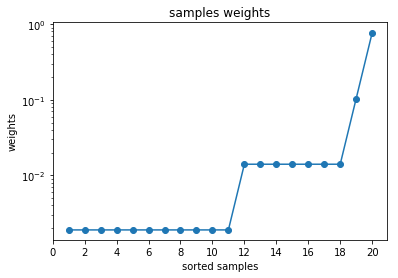

In [41]:
algo = LogisticRegression()
model = AdaBoostClassifier(base_estimator=algo, n_estimators=10)
model.fit(X_train[not_outliers], y_train[not_outliers])
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

plt.scatter(range(1,21), np.sort(w_i)[-20:])
plt.plot(range(1,21), np.sort(w_i)[-20:])
plt.title("samples weights")
plt.xlabel("sorted samples")
plt.yscale('log')
plt.ylabel("weights")
plt.xticks(range(0,21,2))
plt.show()

In [46]:
np.sort(w_i)[-20:]

array([0.00190187, 0.00190187, 0.00190187, 0.00190187, 0.00190187,
       0.00190187, 0.00190187, 0.00190187, 0.00190187, 0.00190187,
       0.00190187, 0.01405302, 0.01405302, 0.01405302, 0.01405302,
       0.01405302, 0.01405302, 0.01405302, 0.10383855, 0.76726884])

In [44]:
w_i

array([4.71426268e-06, 3.48339514e-05, 3.48339514e-05, 4.71426268e-06,
       3.48339514e-05, 2.57390021e-04, 4.71426268e-06, 4.71426268e-06,
       4.71426268e-06, 4.71426268e-06, 2.57390021e-04, 4.71426268e-06,
       2.57390021e-04, 3.48339514e-05, 3.48339514e-05, 3.48339514e-05,
       2.57390021e-04, 3.48339514e-05, 3.48339514e-05, 4.71426268e-06,
       1.40530190e-02, 1.40530190e-02, 3.48339514e-05, 4.71426268e-06,
       4.71426268e-06, 1.40530190e-02, 4.71426268e-06, 3.48339514e-05,
       3.48339514e-05, 1.03838546e-01, 4.71426268e-06, 1.90186931e-03,
       3.48339514e-05, 1.40530190e-02, 4.71426268e-06, 3.48339514e-05,
       2.57390021e-04, 4.71426268e-06, 1.90186931e-03, 3.48339514e-05,
       4.71426268e-06, 2.57390021e-04, 3.48339514e-05, 4.71426268e-06,
       4.71426268e-06, 2.57390021e-04, 3.48339514e-05, 4.71426268e-06,
       4.71426268e-06, 3.48339514e-05, 1.90186931e-03, 4.71426268e-06,
       1.40530190e-02, 1.90186931e-03, 2.57390021e-04, 4.71426268e-06,
      